In [1]:
"""
"""

'\n'

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [ ]:
DATE = 250319
animal = "Diego"

# DATE = 240829
# animal = "Pancho"


In [ ]:
# To get two days, 
animal = "Diego"

DATE = 240605
MS1 = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt")   
DATE = 240614
MS2 = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt")   


In [ ]:
list(range(2))

Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*231122*/**
Found this many paths:
4
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/231122/Diego-231122-161439
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/231122/Diego-231122-165717
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/231122/Diego-231122-170427
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/231122/Diego-231122-172308
session:  0
Beh Sessions that exist on this date:  {231122: [(1, 'chardiego1c'), (2, 'chardiego1c'), (3, 'chardiego1c'), (4, 'chardiego1c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['chardiego1c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
USING THIS SPIKES VERSION:  tdt
Searching using this string:
/home/lucas/mnt/Freiwald/ltian/recordings/*Diego*/*231122*/**
Found this many paths:
4
---
/home/lucas/mnt/Freiwald/ltian/recordings/Diego/231122/Diego-231122-161439
---
/home/lucas/mnt/Frei

AssertionError: assuming you wanted to get daily, but somehow failed and got to here... check that daily dataset actually exists.

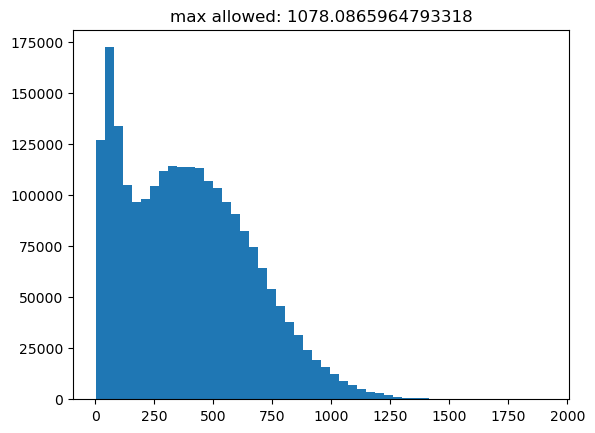

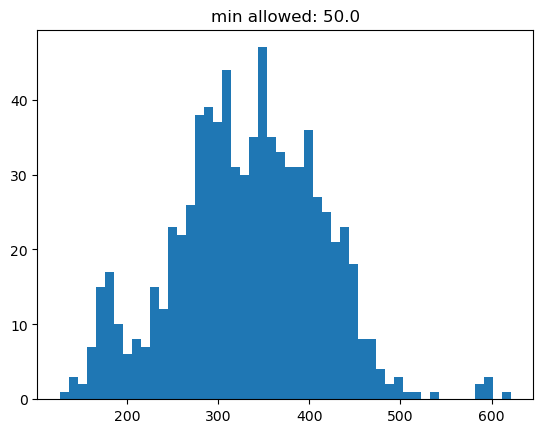

In [5]:
DATE = 231122
animal = "Diego"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, Diego_use_main_21=False)   


In [ ]:
sn = MS.SessionsList[0]
for k, v in sn.sitegetterKS_generate_mapper_region_to_sites_BASE().items():
    print(k, " -- ", v)

In [ ]:
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="kilosort_if_exists")   


In [ ]:
sn = MS.SessionsList[1]
sn.get_trials_list(False)

In [ ]:
sn.get_trials_list(only_if_in_dataset=True)

In [ ]:
MS.spikes_version()

In [ ]:
sn.SPIKES_VERSION

In [ ]:
MS.sitegetter_all()

In [ ]:
from neuralmonkey.classes.session import load_session_helper
DATE = "231218"
rec_session = 0
animal = "Diego"
SN = load_session_helper(DATE, None, rec_session, animal, None,  
    ACTUALLY_BAREBONES_LOADING = True) # Very quick loading


In [ ]:
# Load a single session
sess = 1
sn_KS = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="kilosort")

# Load a single session
sess = 1
sn_TD = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=True, spikes_version="tdt")

In [ ]:
# Load a single session (WITHOUT MINIMAL LOADING)
sess = 1
sn = load_session_helper(DATE, rec_session=sess, animal=animal, MINIMAL_LOADING=False, spikes_version="kilosort_if_exists")


### Devo - check whether fixations have been extracted fro this day

In [ ]:
for sn in MS.SessionsList:
    print(sn.clusterfix_check_if_preprocessing_complete())

### Merging kilosort and tdt, to maximize unit yield

In [ ]:
sn = MS.SessionsList[0]
sn.DatAll[0]


In [ ]:
sn.get_trials_list()

In [ ]:
sn.datall_TDT_KS_slice_single_bysite

In [ ]:
DATE

In [ ]:
sn._datallTDT_slice_single(2,1, 378)


In [ ]:
1

# Debugging "FULL LOADING MODE" stuff

In [ ]:
sn._MapperTrialcode2TrialToTrial

In [ ]:
sn.get_trials_list(True)

In [ ]:
sn.events_get_time_using_photodiode()

In [ ]:
sn.load_tdt_tank(include_streams=True, force_reload_from_raw=True)

In [ ]:
sn.DatTank["streams"][""]

In [ ]:
sn.DatTank["streams"]

In [ ]:
sn.events_get_time_using_photodiode_and_save()

In [ ]:
SN = sn

# save sanity checsk of pd crossings/events.
SN.eventsdataframe_sanity_check()

########## SAVE CACHED
# ALways run this since it is quick
SN._savelocalcached_extract()

# save_datslices = not checkIfDirExistsAndHasFiles(path)[1] # save if not already done.
save_datslices = not SN._savelocalcached_checksaved_datslice()
# then already extracted

SN._savelocalcached_save(save_datslices=save_datslices)

# Then delete the old data, as is redundant with the cached local
if SN._savelocalcached_check_done():
    print("DELETING, becuause they are redundant with datslices:")
    print(SN.Paths["datall_local"])
    print(SN.Paths["spikes_local"])
    os.remove(SN.Paths["datall_local"])
    os.remove(SN.Paths["spikes_local"])
else:
    assert False, "should have all been extracted in _savelocalcached_save"


# Kilosort debugging

### Compare ks to tdt 

In [ ]:
sn = MS.SessionsList[3]
savedir = "/tmp/ksgood"
sn.ks_plot_compare_tdt_to_kilosort("/tmp")

### Kilosort, get time global of start of current session, for extracting time of tdt spikes

In [ ]:
from neuralmonkey.utils.directory import rec_session_durations_extract_kilosort
out = rec_session_durations_extract_kilosort(animal, DATE)
print("-------------------------")
for k, v in out.items():
    print(k, " -- ", v)
duration_total_using_rs4_dict

sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()
# Sanity check, compare ks to tdt activity.
sn_KS.datall_TDT_KS_slice_single_bysite(1412, 0)
sn_KS.sitegetterKS_all_sites()
sn.

### Overlay spikes onto raw data

In [ ]:
sn_KS = MS.SessionsList[1]

In [ ]:
sn_KS.SPIKES_VERSION = "kilosort"
sn_KS._SPIKES_VERSION_INPUTED = "kilosort"

In [ ]:
sn_KS.sitegetterKS_all_sites()

In [ ]:
site = 1273
trial = sn_KS.get_trials_list(True)[-2]
print(sn_KS.sitegetterKS_thissite_info(site))

In [ ]:
sn_KS.spiketimes_ks_compute_timeglobal_thissession_start()

In [ ]:

twind_plot = None
twind_plot = [0.2, 0.25]
sn_KS.plot_raw_overlay_spikes_on_raw_filtered(site, trial, twind_plot)
sn_KS.ks_plot_compare_overlaying_spikes_on_raw_filtered(site, trial)

### Plot example raster

In [ ]:
for t in trials:
    assert sn_KS.datasetbeh_trial_to_trialcode(t)==sn_TD.datasetbeh_trial_to_trialcode(t)
    assert sn_KS.datasetbeh_trial_to_datidx(t)==sn_TD.datasetbeh_trial_to_datidx(t)
    
assert np.all(sn_TD.Datasetbeh.Dat["trialcode"] == sn_KS.Datasetbeh.Dat["trialcode"])

In [ ]:
sn_KS._CachedTrialOnset == sn_TD._CachedTrialOnset


In [ ]:
sn_KS.RecPathBaseLocal

In [ ]:

sn_KS._CachedTrialOnset 

In [ ]:
site = 125
trials = sn_TD.get_trials_list(True)
sn_TD.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

In [ ]:
site = 1127

site = 7
sn_KS.sitegetterKS_thissite_info(site)

In [ ]:
trials = sn_KS.get_trials_list(True)
sn_KS.plotwrapper_raster_multrials_onesite(trials[::15], site=site, plot_beh=False);

##### Fixation touch and done

In [ ]:
trial = 813
sn.beh_extract_touch_in_done_button(trial,  ploton=True)

In [ ]:
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=48, ploton=True)
trial = 114
# sn.beh_extract_touch_in_fixation_square(trial, window_delta_pixels=52, ploton=True)
times, touch = sn.beh_extract_touch_in_fixation_square(trial, ploton=True)



# Debugging event extraction (e.g., photodiode)

##### Sanity checks across trialsm

In [ ]:
# Compare times of events, e..g, make sure done alway soccurs after 
for trial in sn.get_trials_list(True):
    print(trial)
    
    tmp = sn.events_get_times_as_array(trial, ["fixtch", "go", "doneb"])
    if np.isnan(tmp[2]):
        continue
    else:
#         print(tmp[2] - tmp[1])
        assert (tmp[2] - tmp[1])>0
        

In [ ]:
# trial = 243
event = "rulecue2"
for trial in sn.get_trials_list(True):
    a = sn.events_get_time_using_photodiode(trial, list_events=[event])
    b = sn.events_get_time_using_photodiode(trial, list_events=[event], do_reextract_even_if_saved=True)
    if a!=b:
        suff = "******"
    else:
        suff = ""
    print(trial, a, b, a==b, suff)
    if len(a[event])>0:
        assert np.abs(a[event][0]-b[event][0])<0.01


##### Plot pd

In [ ]:
# >>>>>>>>>>>>>>>
# trial, event: 1 rulecue2
# **
# Animal:  Pancho
# ExptSynapse:  Lucas512-220520-115835
# Date:  240828
# RecSession 0
# RecPathBase:  /home/lucas/mnt/Freiwald/ltian/recordings
# BehExpt:  ['gramsuppancho2']
# BehExptSess:  [1]
# final_dir_name:  Pancho-240828-153012


In [ ]:
trial = 508
event = "samp"
sn.events_get_time_using_photodiode(trial, list_events=[event])


In [ ]:
%matplotlib inline

trial = 508
event = "samp"
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, 
                                    do_reextract_even_if_saved=True)


In [ ]:
trial = 1
event = "done_button"
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, 
                                    do_reextract_even_if_saved=True)


In [ ]:
sn.

In [ ]:
set([x[1] for x in sn.EventsTimeUsingPhd.keys()])

In [ ]:
events_to_keep = ["fixcue", "rulecue2", "samp", "go", "seqon", 
                  "post", "reward_all", "seqon"]

{x:vals for x, vals in sn.EventsTimeUsingPhd.items() if x[1] in events_to_keep}

In [ ]:
events_to_keep = ["fixcue", "go", "go_cue"
 'on_strokeidx_0',
 'post',
 'reward_all',
 'rulecue2',
 'samp]

In [ ]:
{x:vals for x, vals in sn.EventsTimeUsingPhd.items() if x[1]=="fixtch"}

In [ ]:
import numpy as np
np.linspace(-0.015, 0.055, 50)

In [ ]:
np.linspace(-0.045, 0.045, )

In [ ]:
np.linspace(1,10)


In [ ]:
print(10)

In [ ]:
sn.events_get_time_sorted(trial, ["fixcue", "fixtch"])[0]

In [ ]:
trial = 594
%matplotlib inline
sn.events_get_time_using_photodiode(trial, list_events=[event], plot_beh_code_stream = True, overwrite=True)

##### Problem: fixtouch even before fixation cue onset

In [ ]:
# Solution: detect cases. call the onset the same time as fixcue onset.

In [ ]:
for t in sn.get_trials_list(True):
    if sn.beh_check_touching_fixation_square_during_onset(t):
        print(t)

In [ ]:
touch.shape

In [ ]:
trial= 237
sn.beh_extract_touch_in_fixation_square(trial, ploton=True)

#### Plot

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
sn.extract_data_tank_epocs("camtrialoff")

In [ ]:
# sn.DatTank["streams"]["Mic1"]
# sn.DatTank["streams"]["PhD2"]
# sn.DatTank["streams"]["Eyee"]
sn.DatTank["streams"]["PhDi"]

In [ ]:
sn.behcode_extract_times_semantic("go", trial)

In [ ]:
sn.behcode_extract_times_sequence

In [ ]:
sn.behcode_extract_times_semantic("samp", trial)

In [ ]:
2.5 + 0.3*2.5

In [ ]:
%matplotlib inline
sites = sn.sitegetterKS_all_sites()
trial= 508
sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=False,  overlay_trial_events_notpd=True)
# sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:10], overlay_trial_events=True,  overlay_trial_events_notpd=False)



In [ ]:
trials = sn.get_trials_list(True, True)
sites = sn.sitegetter_all()
pre = -0.55
post = -0.05
sn.smoothedfr_extract_timewindow(trials, sites, "first_raise", pre, post)

sn.events_get_time_using_photodiode(269, list_events=["first_raise"], plot_beh_code_stream = True, overwrite=True)

In [ ]:
%matplotlib inline
sites = sn.sitegetterKS_all_sites()
for trial in sn.get_trials_list()[10:30]:
    fig1, fig2 = sn.plotwrapper_raster_oneetrial_multsites(trial, sites[:5])
    from pythonlib.tools.pandastools import savefig
    savefig(fig1, f"/tmp/FIG-{trial}.png")
    assert False
    plt.close("all")

In [ ]:
sn.datasetbeh_trial_to_trialcode(19)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_dist_pop_script import plot_all_results_time_trajectories
plot_all_results_time_trajectories()

### Check camera frame times -- GOOD, for Dan Hanuska, overlaying (i) raw ml2 times (ii) extract frame times, and (iii) various other trial things, like strokes.


In [ ]:
from pythonlib.tools.plottools import savefig

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
trials = sn.get_trials_list()

In [ ]:

for trial in trials[10:20]:
    fig, ax = plt.subplots(figsize=(120, 5))

    # "Final" event times.
    sn.plot_epocs(ax, trial, label_cam_frames=True)
    sn.plotmod_overlay_trial_events(ax, trial)
    for stream in ["pd1", "pd2"]:
        sn.plot_stream(ax, trial, stream)

    # Plot the ground truth camera voltages.
    fd, fd_trialnum = sn.beh_get_fd_trial(trial)
    vals = mkl.getTrialsAnalogData(fd, fd_trialnum, "Btn1")

    times_cam_ml2 = vals[:, 1]
    vals_cam_ml2 = vals[:, 0]

    ax.plot(times_cam_ml2, vals_cam_ml2*120, "x-", alpha=0.2)

    # overlay the original stroke times
    times_strokes_on, times_strokes_off = sn.strokes_extract_ons_offs(trial, "old")
    print(times_strokes_on, times_strokes_off)
    for on in times_strokes_on:
        ax.axvline(on)
    for off in times_strokes_off:
        ax.axvline(off)

    tc = sn.datasetbeh_trial_to_trialcode(trial)
    savefig(fig, f"/tmp/trial={trial}-tc={tc}-NOLAG.png")

    plt.close("all")

In [ ]:
trial = 10
print(sn.datasetbeh_trial_to_trialcode(trial))
print(sn.behcode_extract_times_sequence(trial, [16]))

times_strokes_on, times_strokes_off = sn.strokes_extract_ons_offs(trial, "old")
print(times_strokes_on, times_strokes_off)


# Get times of events on each trial

In [ ]:
SN = MS.SessionsList[0]
SN.eventsdataframe_sanity_check()

### Get beh

In [ ]:
strokes = sn.strokes_extract(1)

In [ ]:
strokes

# Sanity check: arrays match across dates?

In [ ]:
sn1 = MS1.SessionsList[0]
sn2 = MS2.SessionsList[0]


In [ ]:
dfres1 = sn1.sanity_waveforms_all_arrays_extract()
dfres2 = sn2.sanity_waveforms_all_arrays_extract()

In [ ]:
# Plot -- make a heatmap showing all the channels
from pythonlib.tools.pandastools import plot_subplots_heatmap
_, _, DictSubplotsDf1 = plot_subplots_heatmap(dfres1, "region", "site_within", "peak_minus_trough", None, False, 
                                              True, annotate_heatmap=False, W = 6, return_dfs=True)
_, _, DictSubplotsDf2 = plot_subplots_heatmap(dfres2, "region", "site_within", "peak_minus_trough", None, False, 
                                              True, annotate_heatmap=False, W = 6, return_dfs=True)

In [ ]:
dat1 = DictSubplotsDf1["dummy"] # (region, electrode)
dat2 = DictSubplotsDf2["dummy"] # (region, electrode)


In [ ]:
savedir = "/tmp"
sn1._sanity_waveforms_verify_finally(dat1, dat2, savedir)

##### Another version, using entire waveform, not just the statistics

In [ ]:
dat1time = sn1._sanity_waveforms_concat_waveforms(dfres1)
dat2time = sn1._sanity_waveforms_concat_waveforms(dfres2)

In [ ]:
savedir = "/tmp"
passed_cross, passed_flip, dfcross = sn1._sanity_waveforms_verify_finally(dat1time, dat2time, savedir)

In [ ]:
dat1

In [ ]:
import pandas as pd
dat1_flipped = pd.DataFrame(np.fliplr(dat1), index=dat1.index)
dat2_flipped = pd.DataFrame(np.fliplr(dat2), index=dat2.index)

In [ ]:
_, dfcross = sn1._sanity_waveforms_verify_finally(dat1, dat2, savedir, suffix="test")
_, dfcross_rev = sn1._sanity_waveforms_verify_finally(dat1, dat2_flipped, savedir, suffix="test")


In [ ]:
dfcorr = dfcross[dfcross["region1"] == dfcross["region2"]]
dfcorr_rev = dfcross_rev[dfcross_rev["region1"] == dfcross_rev["region2"]]

In [ ]:
assert np.all(dfcorr["region1"] == dfcorr_rev["region1"])
assert np.all(dfcorr["region2"] == dfcorr_rev["region2"])

all(dfcorr["corr"] > dfcorr_rev["corr"])

In [ ]:
dfcross_rev

##### Devo code

In [ ]:
# For each electrode, determine its average spike 

In [ ]:
sn = MS.SessionsList[0]

In [ ]:
sites = sn.sitegetterKS_all_sites()
s = sites[0]

In [ ]:
s=193
sn.load_spike_waveforms(s)

In [ ]:
waveforms = sn.DatSpikeWaveforms[s]
print(waveforms.shape)

In [ ]:
# For each channel, collect information about spikes
fig, ax = plt.subplots()
if False:
    ts = np.arange(waveforms.shape[1])
    for i in range(100):
        ax.plot(ts, waveforms[i, :])
else:
    sn.plot_spike_waveform(ax, waveforms)

In [ ]:
    waveforms = sn.DatSpikeWaveforms[s]


In [ ]:
sn.sitegetterKS_generate_mapper_region_to_sites_BASE(clean=False)

In [ ]:
len(sn.sitegetterKS_all_sites(clean=False))

In [ ]:
# Get site number within region. 

In [ ]:
import pandas as pd
dfres = pd.DataFrame(res)
dfres

##### Make a heatmap showing all channels along with waveforms, i.e., concatenated.

In [ ]:
# for each gregion, collect all sites in order and concatenate.
